In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weekly_fuel_prices_all_data_from_2005_to_20210823.csv')
df.head()

,SURVEY_DATE,PRODUCT_ID,PRODUCT_NAME,PRICE,VAT,EXCISE,NET,CHANGE
0,2005-01-03,1,Euro-Super 95,1115.75,185.96,558.64,371.15,-1.57
1,2005-01-03,2,Automotive gas oil,1018.28,169.71,403.21,445.36,-0.33
2,2005-01-03,3,Heating gas oil,948.50,158.08,403.21,387.21,-22.55
3,2005-01-03,5,LPG,552.50,92.08,156.62,303.80,0.22
4,2005-01-03,6,Residual fuel oil,553.25,50.30,166.84,336.11,-12.21


In [3]:
df['PRODUCT_NAME'].value_counts()

Euro-Super 95         830
Automotive gas oil    830
Heating gas oil       830
LPG                   830
Residual fuel oil     830
Heavy fuel oil        830
Name: PRODUCT_NAME, dtype: int64

#### Checking Shape

In [4]:
df.shape

(4980, 8)

#### Checking Null Values In Dataset

In [5]:
df.isnull().sum()

SURVEY_DATE     0
PRODUCT_ID      0
PRODUCT_NAME    0
PRICE           0
VAT             0
EXCISE          0
NET             0
CHANGE          0
dtype: int64

###### No Null Values Are Present In The Dataset

In [6]:
df['PRICE'].value_counts()

609.37     24
651.59     16
553.20     10
551.88      8
553.44      6
           ..
490.75      1
1470.51     1
1349.45     1
1283.47     1
529.89      1
Name: PRICE, Length: 4720, dtype: int64

#### Selecting SURVEY_DATE And PRICE Columns For Forecasting

In [7]:
df1 = df[['SURVEY_DATE','PRICE']]
df1.head()

,SURVEY_DATE,PRICE
0,2005-01-03,1115.75
1,2005-01-03,1018.28
2,2005-01-03,948.50
3,2005-01-03,552.50
4,2005-01-03,553.25


In [8]:
df1['SURVEY_DATE'].value_counts()

2005-01-03    6
2016-03-14    6
2016-01-04    6
2016-01-11    6
2016-01-18    6
             ..
2010-07-26    6
2010-08-02    6
2010-08-09    6
2010-08-16    6
2021-08-16    6
Name: SURVEY_DATE, Length: 830, dtype: int64

In [9]:
df1 = df1.groupby(['SURVEY_DATE'])['PRICE'].mean().reset_index()
df1

,SURVEY_DATE,PRICE
0,2005-01-03,736.300000
1,2005-01-10,730.915000
2,2005-01-17,734.236667
3,2005-01-24,737.906667
4,2005-01-31,750.216667
...,...,...
825,2021-07-19,1086.850000
826,2021-07-26,1084.550000
827,2021-08-02,1087.373333
828,2021-08-09,1083.546667


In [10]:
d = df1['SURVEY_DATE'].value_counts()
d[d>1]

Series([], Name: SURVEY_DATE, dtype: int64)

In [11]:
df1.dtypes

SURVEY_DATE     object
PRICE          float64
dtype: object

#### Changing SURVEY_COLUMN To Datetime Format

In [12]:
df1['SURVEY_DATE'] = pd.to_datetime(df1['SURVEY_DATE'])
df1.sort_values('SURVEY_DATE',inplace=True)
df1.head()

,SURVEY_DATE,PRICE
0,2005-01-03,736.300000
1,2005-01-10,730.915000
2,2005-01-17,734.236667
3,2005-01-24,737.906667
4,2005-01-31,750.216667


In [13]:
df1.set_index('SURVEY_DATE',inplace=True)
df1.head()

,PRICE
SURVEY_DATE,
2005-01-03,736.300000
2005-01-10,730.915000
2005-01-17,734.236667
2005-01-24,737.906667
2005-01-31,750.216667


In [14]:
df1.head(25)

,PRICE
SURVEY_DATE,
2005-01-03,736.300000
2005-01-10,730.915000
2005-01-17,734.236667
2005-01-24,737.906667
2005-01-31,750.216667
2005-02-07,746.933333
2005-02-14,747.961667
2005-02-21,748.141667
2005-02-28,755.055000


In [15]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,kpss

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.linear_model import LinearRegression

In [16]:
df1 = df1['PRICE'].resample('MS').mean()
df1

SURVEY_DATE
2005-01-01     737.915000
2005-02-01     749.522917
2005-03-01     777.642778
2005-04-01     802.060833
2005-05-01     783.142667
                 ...     
2021-04-01    1035.767500
2021-05-01    1041.486333
2021-06-01    1058.365417
2021-07-01    1082.921250
2021-08-01    1084.893333
Freq: MS, Name: PRICE, Length: 200, dtype: float64

In [17]:
df1.head()

SURVEY_DATE
2005-01-01    737.915000
2005-02-01    749.522917
2005-03-01    777.642778
2005-04-01    802.060833
2005-05-01    783.142667
Freq: MS, Name: PRICE, dtype: float64

In [18]:
df1 = pd.DataFrame(df1)
df1.head()

,PRICE
SURVEY_DATE,
2005-01-01,737.915000
2005-02-01,749.522917
2005-03-01,777.642778
2005-04-01,802.060833
2005-05-01,783.142667


In [19]:
df1.shape

(200, 1)

In [20]:
def adf_test(data):
    res = adfuller(data)
    print('ADF-Test_Stat',res[0])
    print('p-val',res[1])
    if res[1]> 0.05:
        print('Ho accepted - Data is non-stationary')
    else:
        print('H1 accepted - Data is stationary')

In [21]:
adf_test(df1['PRICE'])

ADF-Test_Stat -2.407126816608766
p-val 0.1397350127471786
Ho accepted - Data is non-stationary


#### Observation - Data is not stationary. Now we will try different methods to make data Stationary

In [22]:
df1['Lag1'] = df1['PRICE'].shift(+1)
df1['Lag2'] = df1['PRICE'].shift(+2)
df1.head()

,PRICE,Lag1,Lag2
SURVEY_DATE,,,
2005-01-01,737.915000,NaN,NaN
2005-02-01,749.522917,737.915000,NaN
2005-03-01,777.642778,749.522917,737.915000
2005-04-01,802.060833,777.642778,749.522917
2005-05-01,783.142667,802.060833,777.642778


In [23]:
df1.dropna(inplace=True)

In [24]:
df1.head()

,PRICE,Lag1,Lag2
SURVEY_DATE,,,
2005-03-01,777.642778,749.522917,737.915000
2005-04-01,802.060833,777.642778,749.522917
2005-05-01,783.142667,802.060833,777.642778
2005-06-01,805.715000,783.142667,802.060833
2005-07-01,828.282500,805.715000,783.142667


In [25]:
adf_test(df1['Lag1'])

ADF-Test_Stat -2.344384389482103
p-val 0.15805227305480535
Ho accepted - Data is non-stationary


In [26]:
adf_test(df1['Lag2'])

ADF-Test_Stat -2.4038309071127837
p-val 0.14065808158189214
Ho accepted - Data is non-stationary


In [27]:
df1['Diff1'] = df1['PRICE'].diff(1)
df1['Diff2'] = df1['PRICE'].diff(2)
df1.head()

,PRICE,Lag1,Lag2,Diff1,Diff2
SURVEY_DATE,,,,,
2005-03-01,777.642778,749.522917,737.915000,NaN,NaN
2005-04-01,802.060833,777.642778,749.522917,24.418056,NaN
2005-05-01,783.142667,802.060833,777.642778,-18.918167,5.499889
2005-06-01,805.715000,783.142667,802.060833,22.572333,3.654167
2005-07-01,828.282500,805.715000,783.142667,22.567500,45.139833


In [28]:
df1.dropna(inplace=True)

In [29]:
df1.head()

,PRICE,Lag1,Lag2,Diff1,Diff2
SURVEY_DATE,,,,,
2005-05-01,783.142667,802.060833,777.642778,-18.918167,5.499889
2005-06-01,805.715000,783.142667,802.060833,22.572333,3.654167
2005-07-01,828.282500,805.715000,783.142667,22.567500,45.139833
2005-08-01,836.212500,828.282500,805.715000,7.930000,30.497500
2005-09-01,874.199583,836.212500,828.282500,37.987083,45.917083


In [30]:
adf_test(df1['Diff1'])

ADF-Test_Stat -8.107766849512986
p-val 1.2494150284880713e-12
H1 accepted - Data is stationary


#### Observation - Data is stationary according at Diff1

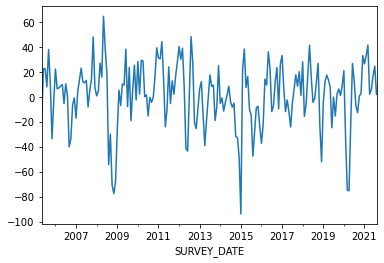

In [31]:
df1['Diff1'].plot()
plt.show()

<AxesSubplot:xlabel='SURVEY_DATE'>

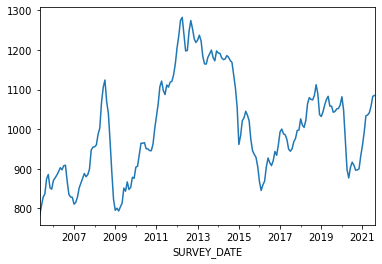

In [32]:
df1['PRICE'].plot()

In [33]:
df1['PRICE'].shape
print(type(df1['PRICE']))

<class 'pandas.core.series.Series'>


In [49]:
df3 = pd.DataFrame(df1['PRICE'])

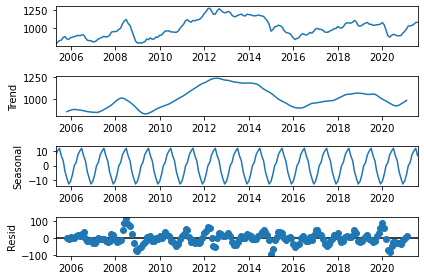

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2, model='additive')
result.plot()
plt.show()

In [50]:
df3.shape

(196, 1)

### AutoCorrelation (ACF) and Partial Autorrelation (PACF)

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

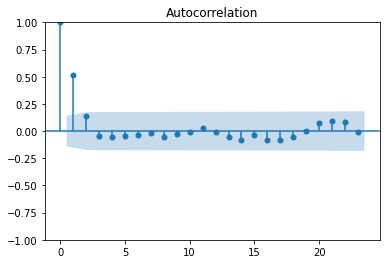

In [38]:
plot_acf(df1['Diff1'])
plt.show()
# q = 3

C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


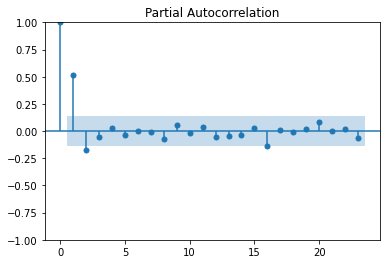

In [39]:
plot_pacf(df1['Diff1'])
plt.show()
# p = 2

### Observation 
***Data is seen as stationery at diff1 ( that means d=1) when the AR value is 2 (p=2) and MA value is 3 (q=3), hence giving the following ARIMA values***
***(p,d,q) = (2,1,3)***

In [40]:
df1['Diff1'].shape

(196,)

In [41]:
df1['PRICE'].shape

(196,)

In [51]:
df2=df1['PRICE']
df2.head()

SURVEY_DATE
2005-05-01    783.142667
2005-06-01    805.715000
2005-07-01    828.282500
2005-08-01    836.212500
2005-09-01    874.199583
Freq: MS, Name: PRICE, dtype: float64

### Data Split

In [52]:
train = df3[:158]
test = df3[158:]
print('Train_tail',train.tail())
print('Test_tail',test.head())

Train_tail                    PRICE
SURVEY_DATE             
2018-02-01   1010.203750
2018-03-01   1004.171667
2018-04-01   1022.465667
2018-05-01   1063.793750
2018-06-01   1079.545833
Test_tail                    PRICE
SURVEY_DATE             
2018-07-01   1075.119000
2018-08-01   1073.716250
2018-09-01   1085.301667
2018-10-01   1112.088333
2018-11-01   1088.981250


In [53]:
print(train.shape)
print(test.shape)

(158, 1)
(38, 1)


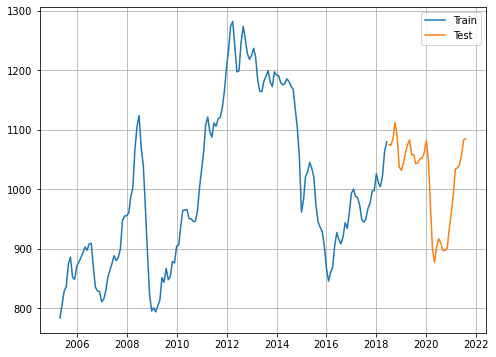

In [54]:
plt.figure(figsize=(8,6))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.grid()
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Model Building

In [56]:
def test_metrics(test,pred):
    mse = mean_squared_error(test,pred)
    rmse = mean_squared_error(test,pred,squared=False)
    mape = mean_absolute_percentage_error(test,pred)
    return mse,rmse,mape

### AR Model (2,0,0)

In [57]:
m1 = ARIMA(train,order=(2,0,0))
ar_m1 = m1.fit()
print(ar_m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                  158
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -710.798
Date:                Tue, 15 Nov 2022   AIC                           1429.597
Time:                        10:58:02   BIC                           1441.847
Sample:                    05-01-2005   HQIC                          1434.572
                         - 06-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        986.8093     57.799     17.073      0.000     873.526    1100.092
ar.L1          1.5016      0.051     29.572      0.000       1.402       1.601
ar.L2         -0.5265      0.050    -10.607      0.0

In [58]:
fcast_m1 = ar_m1.forecast(38)
fcast_m1

2018-07-01    1085.526418
2018-08-01    1086.213269
2018-09-01    1084.095900
2018-10-01    1080.554943
2018-11-01    1076.352790
2018-12-01    1071.907319
2019-01-01    1067.444608
2019-02-01    1063.084114
2019-03-01    1058.886180
2019-04-01    1054.878523
2019-05-01    1051.070989
2019-06-01    1047.463772
2019-07-01    1044.051979
2019-08-01    1040.828159
2019-09-01    1037.783702
2019-10-01    1034.909603
2019-11-01    1032.196870
2019-12-01    1029.636747
2020-01-01    1027.220816
2020-02-01    1024.941052
2020-03-01    1022.789831
2020-04-01    1020.759935
2020-05-01    1018.844538
2020-06-01    1017.037191
2020-07-01    1015.331804
2020-08-01    1013.722627
2020-09-01    1012.204234
2020-10-01    1010.771504
2020-11-01    1009.419605
2020-12-01    1008.143978
2021-01-01    1006.940318
2021-02-01    1005.804567
2021-03-01    1004.732892
2021-04-01    1003.721679
2021-05-01    1002.767516
2021-06-01    1001.867186
2021-07-01    1001.017650
2021-08-01    1000.216043
Freq: MS, Na

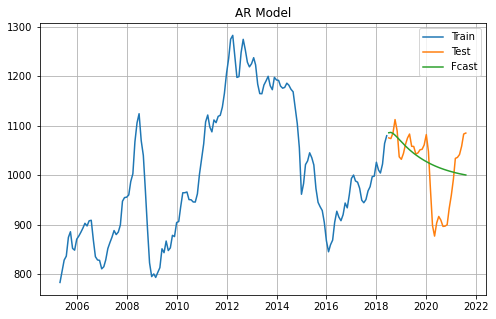

In [59]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m1,label='Fcast')
plt.title('AR Model')
plt.grid()
plt.legend()
plt.show()

In [60]:
aic_m1 = ar_m1.aic
print('AIC',aic_m1)

AIC 1429.5965091440935


In [61]:
mse_m1,rmse_m1,mape_m1  = test_metrics(test,fcast_m1)

In [62]:
m1_res = pd.DataFrame({'Model':'AR(2,0,0)','MSE':mse_m1,'RMSE':rmse_m1,
                       'MAPE':mape_m1,'AIC':aic_m1},index=[1])
m1_res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509


### MA Model

In [63]:
m2 = ARIMA(train,order=(0,0,3))
ar_m2 = m2.fit()
print(ar_m2.summary())

C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                  158
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -805.595
Date:                Tue, 15 Nov 2022   AIC                           1621.191
Time:                        10:58:12   BIC                           1636.504
Sample:                    05-01-2005   HQIC                          1627.410
                         - 06-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1000.2504     14.419     69.372      0.000     971.990    1028.511
ma.L1          1.5361      0.575      2.670      0.008       0.409       2.664
ma.L2          1.3871      0.317      4.369      0.0

In [64]:
fcast_m2 = ar_m2.forecast(38)
fcast_m2

2018-07-01    1037.522970
2018-08-01    1014.372546
2018-09-01     975.112991
2018-10-01    1000.250422
2018-11-01    1000.250422
2018-12-01    1000.250422
2019-01-01    1000.250422
2019-02-01    1000.250422
2019-03-01    1000.250422
2019-04-01    1000.250422
2019-05-01    1000.250422
2019-06-01    1000.250422
2019-07-01    1000.250422
2019-08-01    1000.250422
2019-09-01    1000.250422
2019-10-01    1000.250422
2019-11-01    1000.250422
2019-12-01    1000.250422
2020-01-01    1000.250422
2020-02-01    1000.250422
2020-03-01    1000.250422
2020-04-01    1000.250422
2020-05-01    1000.250422
2020-06-01    1000.250422
2020-07-01    1000.250422
2020-08-01    1000.250422
2020-09-01    1000.250422
2020-10-01    1000.250422
2020-11-01    1000.250422
2020-12-01    1000.250422
2021-01-01    1000.250422
2021-02-01    1000.250422
2021-03-01    1000.250422
2021-04-01    1000.250422
2021-05-01    1000.250422
2021-06-01    1000.250422
2021-07-01    1000.250422
2021-08-01    1000.250422
Freq: MS, Na

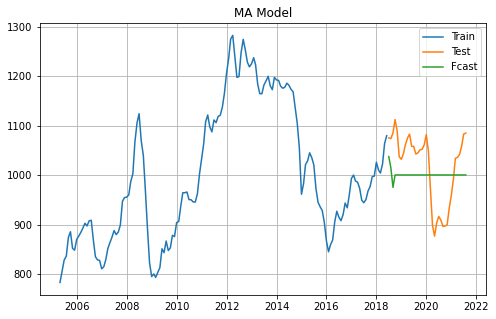

In [65]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m2,label='Fcast')
plt.title('MA Model')
plt.grid()
plt.legend()
plt.show()

In [66]:
aic_m2 = ar_m2.aic
print('AIC',aic_m2)

AIC 1621.1909610741586


In [67]:
mse_m2,rmse_m2,mape_m2  = test_metrics(test,fcast_m2)

In [68]:
m2_res = pd.DataFrame({'Model':'MA(0,0,3)','MSE':mse_m2,'RMSE':rmse_m2,
                       'MAPE':mape_m2,'AIC':aic_m2},index=[2])
m2_res

,Model,MSE,RMSE,MAPE,AIC
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961


In [69]:
res = pd.concat([m1_res,m2_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961


### ARMA (2,0,3)

In [70]:
m3 = ARIMA(train,order=(2,0,3))
ar_m3 = m3.fit()
print(ar_m3.summary())

                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                  158
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -709.876
Date:                Tue, 15 Nov 2022   AIC                           1433.752
Time:                        10:58:23   BIC                           1455.190
Sample:                    05-01-2005   HQIC                          1442.458
                         - 06-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        999.9501     62.809     15.921      0.000     876.847    1123.053
ar.L1          1.5012      1.968      0.763      0.445      -2.355       5.357
ar.L2         -0.5211      1.889     -0.276      0.7

In [71]:
fcast_m3 = ar_m3.forecast(38)
fcast_m3

2018-07-01    1082.203205
2018-08-01    1079.124100
2018-09-01    1076.422506
2018-10-01    1073.492156
2018-11-01    1070.500941
2018-12-01    1067.537559
2019-01-01    1064.647682
2019-02-01    1061.853643
2019-03-01    1059.165175
2019-04-01    1056.585247
2019-05-01    1054.113245
2019-06-01    1051.746701
2019-07-01    1049.482228
2019-08-01    1047.316030
2019-09-01    1045.244172
2019-10-01    1043.262726
2019-11-01    1041.367843
2019-12-01    1039.555795
2020-01-01    1037.822991
2020-02-01    1036.165980
2020-03-01    1034.581456
2020-04-01    1033.066253
2020-05-01    1031.617341
2020-06-01    1030.231821
2020-07-01    1028.906919
2020-08-01    1027.639985
2020-09-01    1026.428483
2020-10-01    1025.269986
2020-11-01    1024.162177
2020-12-01    1023.102837
2021-01-01    1022.089846
2021-02-01    1021.121175
2021-03-01    1020.194887
2021-04-01    1019.309126
2021-05-01    1018.462120
2021-06-01    1017.652172
2021-07-01    1016.877662
2021-08-01    1016.137038
Freq: MS, Na

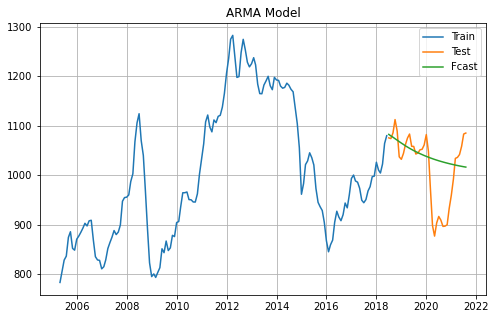

In [72]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m3,label='Fcast')
plt.title('ARMA Model')
plt.grid()
plt.legend()
plt.show()

In [73]:
aic_m3 = ar_m3.aic
print('AIC',aic_m3)

AIC 1433.7521458985407


In [74]:
mse_m3,rmse_m3,mape_m3  = test_metrics(test,fcast_m3)

In [75]:
m3_res = pd.DataFrame({'Model':'ARMA(2,0,3)','MSE':mse_m3,'RMSE':rmse_m3,
                       'MAPE':mape_m3,'AIC':aic_m3},index=[3])
m3_res

,Model,MSE,RMSE,MAPE,AIC
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146


In [76]:
res = pd.concat([res,m3_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146


### ARIMA (2,1,3)

In [77]:
m4 = ARIMA(train,order=(2,1,3))
ar_m4 = m4.fit()
print(ar_m4.summary())

                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                  158
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -704.565
Date:                Tue, 15 Nov 2022   AIC                           1421.131
Time:                        10:58:37   BIC                           1439.468
Sample:                    05-01-2005   HQIC                          1428.578
                         - 06-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9969      0.295      3.379      0.001       0.419       1.575
ar.L2         -0.0267      0.301     -0.089      0.929      -0.616       0.563
ma.L1         -0.4356      0.297     -1.468      0.1

In [78]:
fcast_m4 = ar_m4.forecast(38)
fcast_m4

2018-07-01    1082.050304
2018-08-01    1079.066599
2018-09-01    1077.113143
2018-10-01    1075.245507
2018-11-01    1073.435870
2018-12-01    1071.681756
2019-01-01    1069.981445
2019-02-01    1068.333284
2019-03-01    1066.735675
2019-04-01    1065.187067
2019-05-01    1063.685957
2019-06-01    1062.230889
2019-07-01    1060.820449
2019-08-01    1059.453270
2019-09-01    1058.128025
2019-10-01    1056.843427
2019-11-01    1055.598229
2019-12-01    1054.391223
2020-01-01    1053.221238
2020-02-01    1052.087138
2020-03-01    1050.987823
2020-04-01    1049.922226
2020-05-01    1048.889311
2020-06-01    1047.888078
2020-07-01    1046.917555
2020-08-01    1045.976798
2020-09-01    1045.064896
2020-10-01    1044.180964
2020-11-01    1043.324143
2020-12-01    1042.493602
2021-01-01    1041.688535
2021-02-01    1040.908161
2021-03-01    1040.151721
2021-04-01    1039.418483
2021-05-01    1038.707735
2021-06-01    1038.018786
2021-07-01    1037.350968
2021-08-01    1036.703634
Freq: MS, Na

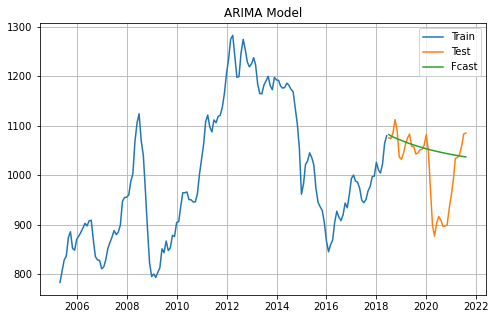

In [79]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m4,label='Fcast')
plt.title('ARIMA Model')
plt.grid()
plt.legend()
plt.show()

In [80]:
aic_m4 = ar_m4.aic
print('AIC',aic_m4)

AIC 1421.1305530809461


In [81]:
mse_m4,rmse_m4,mape_m4  = test_metrics(test,fcast_m4)

In [82]:
m4_res = pd.DataFrame({'Model':'ARIMA(2,1,3)','MSE':mse_m4,'RMSE':rmse_m4,
                       'MAPE':mape_m4,'AIC':aic_m4},index=[4])
m4_res

,Model,MSE,RMSE,MAPE,AIC
4,"ARIMA(2,1,3)",5602.960758,74.852928,0.053488,1421.130553


In [83]:
res = pd.concat([res,m4_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146
4,"ARIMA(2,1,3)",5602.960758,74.852928,0.053488,1421.130553


### SES Model

In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [85]:
alpha=0.3
m5 = ExponentialSmoothing(train)
ses_m5 = m5.fit(smoothing_level=alpha)
print(ses_m5.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    PRICE   No. Observations:                  158
Model:             ExponentialSmoothing   SSE                         355696.537
Optimized:                         True   AIC                           1223.640
Trend:                             None   BIC                           1229.765
Seasonal:                          None   AICC                          1223.901
Seasonal Periods:                  None   Date:                 Tue, 15 Nov 2022
Box-Cox:                          False   Time:                         10:58:50
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
initial_level              821.355

In [86]:
fcast_m5 = ses_m5.forecast(38)
fcast_m5

2018-07-01    1040.889274
2018-08-01    1040.889274
2018-09-01    1040.889274
2018-10-01    1040.889274
2018-11-01    1040.889274
2018-12-01    1040.889274
2019-01-01    1040.889274
2019-02-01    1040.889274
2019-03-01    1040.889274
2019-04-01    1040.889274
2019-05-01    1040.889274
2019-06-01    1040.889274
2019-07-01    1040.889274
2019-08-01    1040.889274
2019-09-01    1040.889274
2019-10-01    1040.889274
2019-11-01    1040.889274
2019-12-01    1040.889274
2020-01-01    1040.889274
2020-02-01    1040.889274
2020-03-01    1040.889274
2020-04-01    1040.889274
2020-05-01    1040.889274
2020-06-01    1040.889274
2020-07-01    1040.889274
2020-08-01    1040.889274
2020-09-01    1040.889274
2020-10-01    1040.889274
2020-11-01    1040.889274
2020-12-01    1040.889274
2021-01-01    1040.889274
2021-02-01    1040.889274
2021-03-01    1040.889274
2021-04-01    1040.889274
2021-05-01    1040.889274
2021-06-01    1040.889274
2021-07-01    1040.889274
2021-08-01    1040.889274
Freq: MS, dt

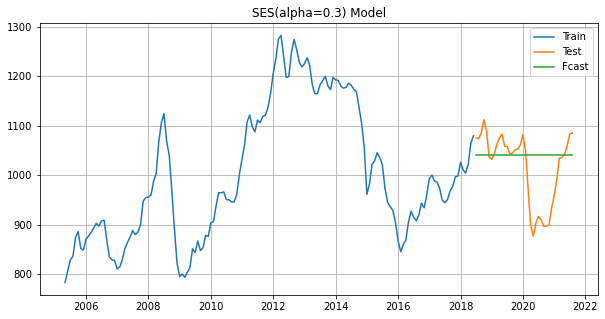

In [106]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m5,label='Fcast')
plt.title('SES(alpha=0.3) Model')
plt.grid()
plt.legend()
plt.show()

In [87]:
aic_m5 = ses_m5.aic
print('AIC',aic_m5)

AIC 1223.6396339099838


In [88]:
mse_m5,rmse_m5,mape_m5  = test_metrics(test,fcast_m5)

In [89]:
m5_res = pd.DataFrame({'Model':'SES(alpha=0.3)','MSE':mse_m5,'RMSE':rmse_m5,
                       'MAPE':mape_m5,'AIC':aic_m5},index=[5])
m5_res

,Model,MSE,RMSE,MAPE,AIC
5,SES(alpha=0.3),5477.168505,74.007895,0.0559,1223.639634


In [90]:
res = pd.concat([res,m5_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146
4,"ARIMA(2,1,3)",5602.960758,74.852928,0.053488,1421.130553
5,SES(alpha=0.3),5477.168505,74.007895,0.055900,1223.639634


### DES Model

In [91]:
alpha=0.5
beta = 0.8
m6 = ExponentialSmoothing(train)
des_m6 = m6.fit(smoothing_level=alpha,smoothing_trend=beta)
print(des_m6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    PRICE   No. Observations:                  158
Model:             ExponentialSmoothing   SSE                         213210.423
Optimized:                         True   AIC                           1142.775
Trend:                             None   BIC                           1148.901
Seasonal:                          None   AICC                          1143.037
Seasonal Periods:                  None   Date:                 Tue, 15 Nov 2022
Box-Cox:                          False   Time:                         10:58:59
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5000000                alpha                False
initial_level              803.349

In [92]:
fcast_m6 = des_m6.forecast(38)
fcast_m6

2018-07-01    1059.361283
2018-08-01    1059.361283
2018-09-01    1059.361283
2018-10-01    1059.361283
2018-11-01    1059.361283
2018-12-01    1059.361283
2019-01-01    1059.361283
2019-02-01    1059.361283
2019-03-01    1059.361283
2019-04-01    1059.361283
2019-05-01    1059.361283
2019-06-01    1059.361283
2019-07-01    1059.361283
2019-08-01    1059.361283
2019-09-01    1059.361283
2019-10-01    1059.361283
2019-11-01    1059.361283
2019-12-01    1059.361283
2020-01-01    1059.361283
2020-02-01    1059.361283
2020-03-01    1059.361283
2020-04-01    1059.361283
2020-05-01    1059.361283
2020-06-01    1059.361283
2020-07-01    1059.361283
2020-08-01    1059.361283
2020-09-01    1059.361283
2020-10-01    1059.361283
2020-11-01    1059.361283
2020-12-01    1059.361283
2021-01-01    1059.361283
2021-02-01    1059.361283
2021-03-01    1059.361283
2021-04-01    1059.361283
2021-05-01    1059.361283
2021-06-01    1059.361283
2021-07-01    1059.361283
2021-08-01    1059.361283
Freq: MS, dt

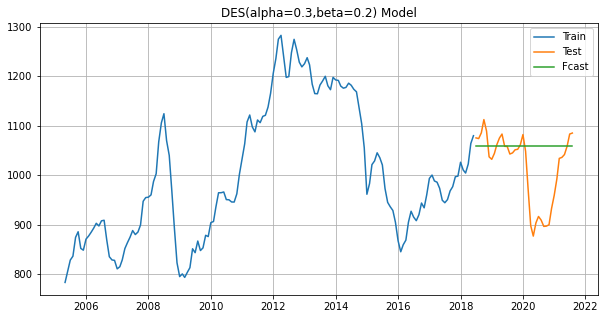

In [93]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m6,label='Fcast')
plt.title('DES(alpha=0.3,beta=0.2) Model')
plt.grid()
plt.legend()
plt.show()

In [94]:
aic_m6 = des_m6.aic
print('AIC',aic_m6)

AIC 1142.7754924677433


In [95]:
mse_m6,rmse_m6,mape_m6  = test_metrics(test,fcast_m6)

In [96]:
m6_res = pd.DataFrame({'Model':'DES(alpha=0.5,beta=0.8)','MSE':mse_m6,'RMSE':rmse_m6,
                       'MAPE':mape_m6,'AIC':aic_m6},index=[6])
m6_res

,Model,MSE,RMSE,MAPE,AIC
6,"DES(alpha=0.5,beta=0.8)",6692.635987,81.808532,0.058896,1142.775492


In [97]:
res = pd.concat([res,m6_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146
4,"ARIMA(2,1,3)",5602.960758,74.852928,0.053488,1421.130553
5,SES(alpha=0.3),5477.168505,74.007895,0.055900,1223.639634
6,"DES(alpha=0.5,beta=0.8)",6692.635987,81.808532,0.058896,1142.775492


### TES Model (Holt Winter Method)

In [98]:
alpha= 0.2
beta = 0.4
gamma = 0.3
m7 = ExponentialSmoothing(train)
tes_m7 = m7.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
print(tes_m7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    PRICE   No. Observations:                  158
Model:             ExponentialSmoothing   SSE                         519747.883
Optimized:                         True   AIC                           1283.564
Trend:                             None   BIC                           1289.689
Seasonal:                          None   AICC                          1283.825
Seasonal Periods:                  None   Date:                 Tue, 15 Nov 2022
Box-Cox:                          False   Time:                         10:59:10
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              834.706

In [99]:
fcast_m7 = tes_m7.forecast(38)
fcast_m7

2018-07-01    1025.528923
2018-08-01    1025.528923
2018-09-01    1025.528923
2018-10-01    1025.528923
2018-11-01    1025.528923
2018-12-01    1025.528923
2019-01-01    1025.528923
2019-02-01    1025.528923
2019-03-01    1025.528923
2019-04-01    1025.528923
2019-05-01    1025.528923
2019-06-01    1025.528923
2019-07-01    1025.528923
2019-08-01    1025.528923
2019-09-01    1025.528923
2019-10-01    1025.528923
2019-11-01    1025.528923
2019-12-01    1025.528923
2020-01-01    1025.528923
2020-02-01    1025.528923
2020-03-01    1025.528923
2020-04-01    1025.528923
2020-05-01    1025.528923
2020-06-01    1025.528923
2020-07-01    1025.528923
2020-08-01    1025.528923
2020-09-01    1025.528923
2020-10-01    1025.528923
2020-11-01    1025.528923
2020-12-01    1025.528923
2021-01-01    1025.528923
2021-02-01    1025.528923
2021-03-01    1025.528923
2021-04-01    1025.528923
2021-05-01    1025.528923
2021-06-01    1025.528923
2021-07-01    1025.528923
2021-08-01    1025.528923
Freq: MS, dt

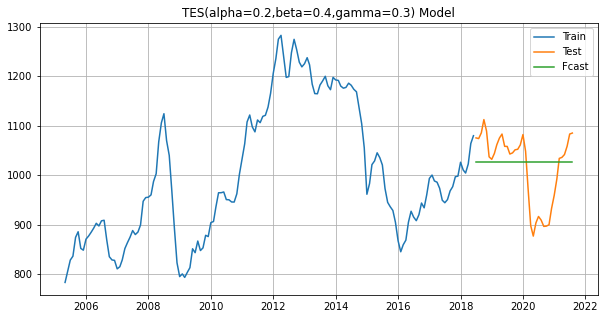

In [100]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m7,label='Fcast')
plt.title('TES(alpha=0.2,beta=0.4,gamma=0.3) Model')
plt.grid()
plt.legend()
plt.show()

In [101]:
aic_m7 = tes_m7.aic
print('AIC',aic_m7)

AIC 1283.5636477306389


In [102]:
mse_m7,rmse_m7,mape_m7  = test_metrics(test,fcast_m7)

In [103]:
m7_res = pd.DataFrame({'Model':'TES(alpha=0.2,beta=0.4,gamma=0.3)','MSE':mse_m7,'RMSE':rmse_m7,
                       'MAPE':mape_m7,'AIC':aic_m7},index=[7])
m7_res

,Model,MSE,RMSE,MAPE,AIC
7,"TES(alpha=0.2,beta=0.4,gamma=0.3)",4986.126622,70.61251,0.059236,1283.563648


In [104]:
res = pd.concat([res,m7_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146
4,"ARIMA(2,1,3)",5602.960758,74.852928,0.053488,1421.130553
5,SES(alpha=0.3),5477.168505,74.007895,0.055900,1223.639634
6,"DES(alpha=0.5,beta=0.8)",6692.635987,81.808532,0.058896,1142.775492
7,"TES(alpha=0.2,beta=0.4,gamma=0.3)",4986.126622,70.612510,0.059236,1283.563648


### PMD Arima

In [105]:
import pmdarima as pm

In [106]:
m8 = pm.auto_arima(train,start_p=0,start_q=0,
              test='adf',
              d=None,                            
              max_p=5,max_q=5,max_d=1,
              start_P=0,start_Q=0,
              D=0,                       
              max_P=5,max_Q=5,
              seasonal=True,
              trace=True,
              suppress_warnings=True, 
              stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1463.959, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1418.277, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1424.220, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1462.831, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1418.410, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1418.839, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1419.643, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1416.634, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1416.804, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1417.217, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1422.771, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1418.096, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.781 seconds


In [107]:
fcast_m8 = m8.predict(38)
fcast_m8

2018-07-01    1087.645583
2018-08-01    1091.810489
2018-09-01    1093.952091
2018-10-01    1095.053306
2018-11-01    1095.619553
2018-12-01    1095.910718
2019-01-01    1096.060436
2019-02-01    1096.137421
2019-03-01    1096.177007
2019-04-01    1096.197362
2019-05-01    1096.207829
2019-06-01    1096.213211
2019-07-01    1096.215978
2019-08-01    1096.217401
2019-09-01    1096.218133
2019-10-01    1096.218509
2019-11-01    1096.218703
2019-12-01    1096.218802
2020-01-01    1096.218853
2020-02-01    1096.218880
2020-03-01    1096.218893
2020-04-01    1096.218900
2020-05-01    1096.218904
2020-06-01    1096.218906
2020-07-01    1096.218907
2020-08-01    1096.218907
2020-09-01    1096.218907
2020-10-01    1096.218907
2020-11-01    1096.218907
2020-12-01    1096.218908
2021-01-01    1096.218908
2021-02-01    1096.218908
2021-03-01    1096.218908
2021-04-01    1096.218908
2021-05-01    1096.218908
2021-06-01    1096.218908
2021-07-01    1096.218908
2021-08-01    1096.218908
Freq: MS, dt

In [108]:
fcast_m8_res = pd.DataFrame({'Date':test.index,'Pred_price':fcast_m8})
fcast_m8_res.set_index('Date',inplace=True)
fcast_m8_res.head()

,Pred_price
Date,
2018-07-01,1087.645583
2018-08-01,1091.810489
2018-09-01,1093.952091
2018-10-01,1095.053306
2018-11-01,1095.619553


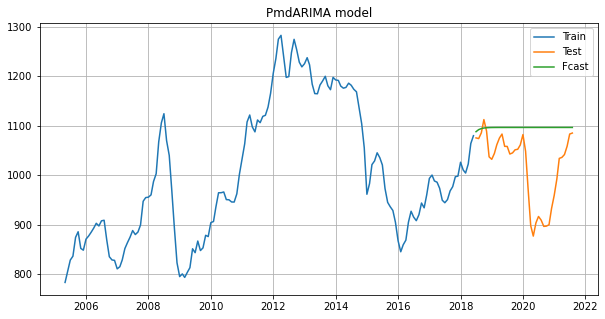

In [109]:
plt.figure(figsize=(10,5))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(fcast_m8_res,label='Fcast')
plt.title('PmdARIMA model')
plt.grid()
plt.legend()
plt.show()

In [110]:
aic_m8 = m8.aic()
print('AIC',aic_m8)
mse_m8,rmse_m8,mape_m8  = test_metrics(test,fcast_m8)

AIC 1416.6336300404846


In [111]:
m8_res = pd.DataFrame({'Model':'PmdARIMA','MSE':mse_m8,'RMSE':rmse_m8,
                       'MAPE':mape_m8,'AIC':aic_m8},index=[8])
m8_res

,Model,MSE,RMSE,MAPE,AIC
8,PmdARIMA,11142.675353,105.558872,0.083491,1416.63363


In [112]:
res = pd.concat([res,m8_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146
4,"ARIMA(2,1,3)",5602.960758,74.852928,0.053488,1421.130553
5,SES(alpha=0.3),5477.168505,74.007895,0.055900,1223.639634
6,"DES(alpha=0.5,beta=0.8)",6692.635987,81.808532,0.058896,1142.775492
7,"TES(alpha=0.2,beta=0.4,gamma=0.3)",4986.126622,70.612510,0.059236,1283.563648
8,PmdARIMA,11142.675353,105.558872,0.083491,1416.633630


### Observation 

***After testing the above models, we get to know that***<br>
***1) Based on RMSE or MSE*** 
   ***AR (2,0,0) or the AR Model is the best suited model for prediction of future fuel price values***

***2) Based on AIC, the most apprpriate model is DES i.e. the double exponential smoothing method***

In [113]:
a = m8.predict(100)
a

2018-07-01    1087.645583
2018-08-01    1091.810489
2018-09-01    1093.952091
2018-10-01    1095.053306
2018-11-01    1095.619553
                 ...     
2026-06-01    1096.218908
2026-07-01    1096.218908
2026-08-01    1096.218908
2026-09-01    1096.218908
2026-10-01    1096.218908
Freq: MS, Length: 100, dtype: float64

In [114]:
a = pd.DataFrame(a)

In [115]:
a

,0
2018-07-01,1087.645583
2018-08-01,1091.810489
2018-09-01,1093.952091
2018-10-01,1095.053306
2018-11-01,1095.619553
...,...
2026-06-01,1096.218908
2026-07-01,1096.218908
2026-08-01,1096.218908
2026-09-01,1096.218908


In [138]:
p = list(range(0,8)) # 0,1,2...,7
q = list(range(0,8)) # 0,1,2...,7
d = list(range(0,3)) # 0,1,2

pdq = []
mse = []
for i in p:
    for j in d:
        for k in q:
            m = ARIMA(train,order=(i,j,k))
            arima = m.fit()
            ypred = arima.forecast(len(test))
            mean_sq_err = mean_squared_error(test,ypred)
            pdq.append((i,j,k))
            mse.append(mean_sq_err)
print(pdq)
print(mse)

C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\base\mode

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 0, 6), (2, 0, 7), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 2, 6), (2, 2, 7), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 0, 6), (3, 0, 7), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 1, 7), (3, 2, 0), (3, 2, 1), (3, 2, 2)

C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [118]:
p = list(range(0,8)) # 0,1,2...,7
q = list(range(0,8)) # 0,1,2...,7
d = list(range(0,3)) # 0,1,2

pdq = []
mse = []
for i in p:
    for j in d:
        for k in q:
            m = ARIMA(train,order=(i,j,k))
            arima = m.fit()
            ypred = arima.forecast(len(test))
            mean_sq_err = mean_squared_error(test,ypred)
            pdq.append((i,j,k))
            mse.append(mean_sq_err)
print(pdq)
print(mse)

C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\base\mode

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 0, 7), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 0, 6), (1, 0, 7), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 1, 6), (1, 1, 7), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 0, 6), (2, 0, 7), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 1, 6), (2, 1, 7), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (2, 2, 6), (2, 2, 7), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 0, 6), (3, 0, 7), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 1, 6), (3, 1, 7), (3, 2, 0), (3, 2, 1), (3, 2, 2)

C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [139]:
print(len(mse))
min_mse = min(mse)
print(min_mse)
print(mse.index(min_mse))

192
3714.1521795002664
76


In [140]:
pdq[76]

(3, 0, 4)

In [141]:
m9 = ARIMA(train,order=(3,0,4))
ar_m9 = m9.fit()
print(ar_m9.summary())

                               SARIMAX Results                                
Dep. Variable:                  PRICE   No. Observations:                  158
Model:                 ARIMA(3, 0, 4)   Log Likelihood                -708.736
Date:                Tue, 15 Nov 2022   AIC                           1435.472
Time:                        11:27:19   BIC                           1463.035
Sample:                    05-01-2005   HQIC                          1446.665
                         - 06-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        993.8965     50.772     19.576      0.000     894.385    1093.408
ar.L1          1.0570      0.202      5.220      0.000       0.660       1.454
ar.L2          0.7980      0.391      2.039      0.0

C:\Users\niksm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [157]:
fcast_m9 = ar_m9.forecast(100)
fcast_m9

2018-07-01    1077.565805
2018-08-01    1072.589748
2018-09-01    1065.815482
2018-10-01    1062.364582
2018-11-01    1056.170421
                 ...     
2026-06-01     980.836865
2026-07-01     981.421046
2026-08-01     981.996660
2026-09-01     982.563070
2026-10-01     983.120104
Freq: MS, Name: predicted_mean, Length: 100, dtype: float64

In [124]:
mse_m9,rmse_m9,mape_m9  = test_metrics(test,fcast_m9)

In [125]:
aic_m9 = ar_m9.aic
print('AIC',aic_m9)

AIC 1435.4715467884337


In [126]:
m9_res = pd.DataFrame({'Model':'ARIMA(3,0,4)','MSE':mse_m9,'RMSE':rmse_m9,
                       'MAPE':mape_m9,'AIC':aic_m9},index=[9])
m9_res

,Model,MSE,RMSE,MAPE,AIC
9,"ARIMA(3,0,4)",3714.15218,60.943844,0.051769,1435.471547


In [129]:
res = pd.concat([res,m9_res])
res

,Model,MSE,RMSE,MAPE,AIC
1,"AR(2,0,0)",3937.553952,62.749932,0.049773,1429.596509
2,"MA(0,0,3)",5174.794271,71.936043,0.066208,1621.190961
3,"ARMA(2,0,3)",4493.437414,67.033107,0.050533,1433.752146
4,"ARIMA(2,1,3)",5602.960758,74.852928,0.053488,1421.130553
5,SES(alpha=0.3),5477.168505,74.007895,0.055900,1223.639634
6,"DES(alpha=0.5,beta=0.8)",6692.635987,81.808532,0.058896,1142.775492
7,"TES(alpha=0.2,beta=0.4,gamma=0.3)",4986.126622,70.612510,0.059236,1283.563648
8,PmdARIMA,11142.675353,105.558872,0.083491,1416.633630
9,"ARIMA(3,0,4)",3714.152180,60.943844,0.051769,1435.471547
9,"ARIMA(3,0,4)",3714.152180,60.943844,0.051769,1435.471547


## CONCLUSION
***1) The conclusion derived by performing the above model is that rmse is least at ARIMA(3,0,4).***<br>
***2) This implies that the most suitable model for prediction is the 9th model as the chances of error are least in it.***<br>
***3) Also, the 9th model was performed in order to see whether the error could be furthur reduced from the given data which
     is the purpose of this project***

### Creating Pickel Files

In [193]:
# import joblib

In [194]:
# joblib.dump(m1, "AR(2,0,0).pkl")

['AR(2,0,0).pkl']

In [195]:
# joblib.dump(m2, "MA(0,0,3).pkl")

['MA(0,0,3).pkl']

In [196]:
# joblib.dump(m3, "ARMA(2,0,3).pkl")

['ARMA(2,0,3).pkl']

In [197]:
# joblib.dump(m4, "ARIMA(2,1,3).pkl")

['ARIMA(2,1,3).pkl']

In [198]:
# joblib.dump(m5, "SES(alpha=0.3).pkl")

['SES(alpha=0.3).pkl']

In [199]:
# joblib.dump(m6, "DES(alpha=0.5,beta=0.8).pkl")

['DES(alpha=0.5,beta=0.8).pkl']

In [200]:
# joblib.dump(m7, "TES(alpha=0.2,beta=0.4,gamma=0.3).pkl")

['TES(alpha=0.2,beta=0.4,gamma=0.3).pkl']

In [201]:
# joblib.dump(m8, "PmdARIMA.pkl")

['PmdARIMA.pkl']